# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
# Думаю, так удобнее :-)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Ученая степень', 'Среднее специальное', 'Неоконченное высшее', 'Неполное среднее', 'Среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Туризм', 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Сборочные производства', 'Подбор персонала', 'Информационные услуги', 'Нефтегазовая промышленность', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Торговля', 'Государственная служба', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Образование', 'Недвижимость', 'Управляющая компания', 'Страхование', 'Логистика', 'Развлечения/Искусство', 'СМИ/Реклама/PR-агенства', 'Наука', 'Информационные технологии', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'Юридические услуги/нотариальные услуги', 'Другие сферы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

#### Ответ:

Из результатов выше, мы знаем, что есть пропущенные значения. Посчитаем число пропусков в данных.

In [16]:
nan_vals_count = df.isnull().sum()
nan_vals_count.iloc[nan_vals_count.nonzero()[0]]

GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
TP_PROVINCE                     590
REGION_NM                         2
WORK_TIME                      2717
PREVIOUS_CARD_NUM_UTILIZED    29533
dtype: int64

In [17]:
def show_data(dataframe, columns=None):
    for i in df_train.columns if columns is None else columns: # перебираем столбцы
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
        

In [18]:
columns_with_na = ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME']
show_data(df, columns_with_na)

GEN_INDUSTRY
{nan, 'Транспорт', 'Туризм', 'Строительство', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Сборочные производства', 'Подбор персонала', 'Информационные услуги', 'Нефтегазовая промышленность', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Торговля', 'Государственная служба', 'Энергетика', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Образование', 'Недвижимость', 'Управляющая компания', 'Страхование', 'Логистика', 'Развлечения/Искусство', 'СМИ/Реклама/PR-агенства', 'Наука', 'Информационные технологии', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Коммунальное хоз-во/Дорожные службы', 'Юридические услуги/нотариальные услуги', 'Другие сферы'}


GEN_TITLE
{'Рабочий', 'Руководитель среднего звена', 'Индивидуальный предприниматель', nan, 'Военнослужащий по контракту', 'Служащий', 'Другое', 'Партнер', 'Работник сферы услуг', 'Высококвалифиц. специалист', 'Руководитель высшего звена', 'Руководитель низшего звена', '

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Есть и их нужно закодировать.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
def preproc_data(df_input):
    df_output = df_input.copy()    
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    columns_to_fix = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    
    for column in columns_to_fix:
        df_output[column] = df_output[column].map(lambda x: x.replace(',', '.')).astype('float')
    
    family_income_list = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.']
     
    for idx, val in enumerate(family_income_list):
        df_output['FAMILY_INCOME'].replace(to_replace = val, value="{}".format(idx), inplace=True)
    
    df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.astype('int64')
    
    df_output.WORK_TIME[df_output.WORK_TIME.isnull()] = df_output.WORK_TIME.mean()
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS'])
    
    df_output = df_output.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM',
                                'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    return df_output

In [20]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

/home/am0z/miniconda3/envs/sfml/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [21]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)

y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [22]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
target = df_preproc['TARGET']
X = df_preproc.drop(['sample', 'TARGET'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)


In [23]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_proba_dtc  = dtc.predict_proba(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_proba_rfc = rfc.predict(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_proba_lr = lr.predict_proba(X_test)


/home/am0z/miniconda3/envs/sfml/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [24]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier:')
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print('='*10)

print('RandomForestClassifier')
print('precision: {}'.format(precision_score(y_test, predict_rfc)))
print('recall: {}'.format(recall_score(y_test, predict_rfc)))
print('accuracy: {}'.format(accuracy_score(y_test, predict_rfc)))
print('='*10)

print('LogisticRegression')
print('precision: {}'.format(precision_score(y_test, predict_lr)))
print('recall: {}'.format(recall_score(y_test, predict_lr)))
print('accuracy: {}'.format(accuracy_score(y_test, predict_lr)))
print('='*10)


DecisionTreeClassifier:
precision 0.17583408476104598
recall 0.1790633608815427
accuracy 0.8
RandomForestClassifier
precision: 0.3018867924528302
recall: 0.014692378328741965
accuracy: 0.8772123893805309
LogisticRegression
precision: 0.14285714285714285
recall: 0.0018365472910927456
accuracy: 0.878429203539823


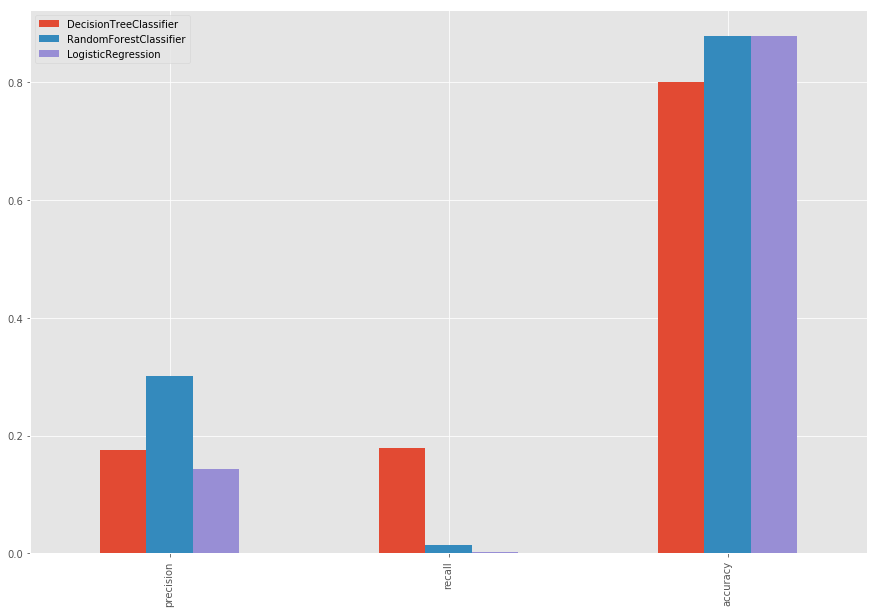

In [25]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,10))

precision1 = precision_score(y_test, predict_dtc)
precision2 = precision_score(y_test, predict_rfc)
precision3 = precision_score(y_test, predict_lr)

recall1 = recall_score(y_test, predict_dtc)
recall2 = recall_score(y_test, predict_rfc)
recall3 = recall_score(y_test, predict_lr)

accuracy1 = accuracy_score(y_test, predict_dtc)
accuracy2 = accuracy_score(y_test, predict_rfc)
accuracy3 = accuracy_score(y_test, predict_lr)

fd = pd.DataFrame([[precision1, precision2, precision3],[recall1, recall2, recall3], [accuracy1, accuracy2, accuracy3]],
                 index=['precision', 'recall', 'accuracy'], columns=pd.Index(['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])).plot(kind='bar', ax=ax)

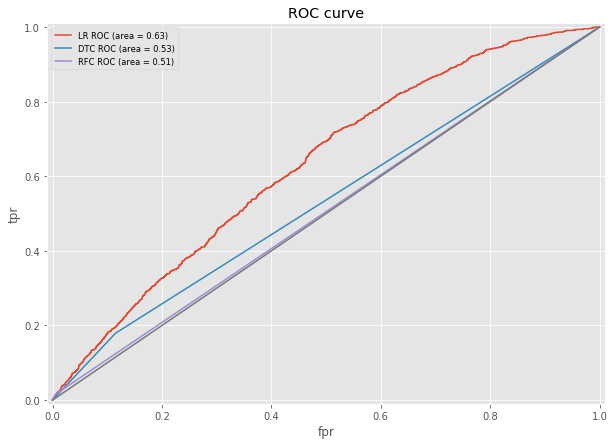

In [26]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 7))

fpr, tpr, thresholds = roc_curve(y_test, predict_proba_lr[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR', roc_auc))

fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba_dtc[:,1])
roc_auc2  = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='%s ROC (area = %0.2f)' % ('DTC', roc_auc2))

fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_proba_rfc)
roc_auc3  = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='%s ROC (area = %0.2f)' % ('RFC', roc_auc3))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc=0, fontsize='small')

In [27]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here
print('dtc: ', cross_val_score(dtc, X_train, y_train, scoring='roc_auc', cv=10))
print('rfc: ', cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=10))
print('lr: ', cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=10))

print('dtc- mean: ', np.mean(cross_val_score(dtc, X_train, y_train, scoring='roc_auc', cv=10)))
print('rfc- mean: ', np.mean(cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=10)))
print('lr- mean: ', np.mean(cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=10)))

/home/am0z/miniconda3/envs/sfml/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


dtc:  [0.53420706 0.52613821 0.53877638 0.54726101 0.51921011 0.54203503
 0.51869371 0.52342394 0.5227423  0.51183591]
rfc:  [0.59342842 0.59250372 0.63756886 0.63057115 0.60166792 0.58235996
 0.62077258 0.62321108 0.58240671 0.58054441]
lr:  [0.62183829 0.61712389 0.66706585 0.64021534 0.62306866 0.60423688
 0.65871228 0.6645525  0.63072661 0.63710172]
dtc- mean:  0.5310606807696305
rfc- mean:  0.5956216481286053
lr- mean:  0.6364642032654912


In [28]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
predict_lr_test = lr.predict_proba(X_test)
print(predict_lr_test)

[[0.81008305 0.18991695]
 [0.85313143 0.14686857]
 [0.8515746  0.1484254 ]
 ...
 [0.93290282 0.06709718]
 [0.85149618 0.14850382]
 [0.70964337 0.29035663]]


/home/am0z/miniconda3/envs/sfml/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [29]:
# Померить roc_auc на тесте
print('lr: ', cross_val_score(lr, X_test, y_test, scoring='roc_auc', cv=10))

lr:  [0.57382094 0.61460966 0.64903352 0.62927702 0.58218222 0.6147366
 0.65449195 0.64028619 0.65645375 0.65658048]
